In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# loading train.csv
df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
#loading test.csv
test_df= pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [3]:
df.head() #first five values in 'train.csv'

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [4]:
test_df.head() #first five values in 'test.csv'

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,c2c61173092ad20db5585ca8c10de6e0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1276.0,0,7.0,0,53447.0,1.0,...,48751.0,0,0.0,0,0,0.0,1.0,11.0,2018-08-12 13:12:00,2018-07-10
1,2e6bb5362ba1ce897feeb1de5edea686,win8defender,1.1.15100.1,4.10.209.0,1.273.371.0,0,7.0,0,46184.0,2.0,...,64709.0,1,0.0,0,0,0.0,0.0,12.0,2018-07-26 06:54:00,2016-10-11
2,692649baed1c50bb8d051ae7f06e3625,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,51954.0,2.0,...,33094.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-27 17:29:00,2018-05-08
3,2ff95e7d97e9f80ec81c97622dd93ed6,win8defender,1.1.15300.6,4.18.1807.18075,1.277.58.0,0,7.0,0,41571.0,2.0,...,26184.0,1,0.0,0,0,0.0,0.0,10.0,2018-09-25 22:13:00,2018-05-08
4,256766b4c5011e146f05b323863e08a4,win8defender,1.1.14800.3,4.14.17639.18041,1.267.898.0,0,7.0,0,40645.0,3.0,...,12126.0,0,0.0,0,0,0.0,0.0,7.0,2018-05-06 01:31:00,2018-06-12


In [5]:
#total number of null values in each column
df.isnull().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

In [6]:
#total number of null values in entire data set
df.isnull().sum().sum()

6533

# Exploratory Data Analysis

In [7]:
#data shape - (rows,columns)
df.shape

(100000, 76)

In [8]:
#data types - identifying feature is numerical, categorical and other types of variable
df.dtypes

MachineID            object
ProductName          object
EngineVersion        object
AppVersion           object
SignatureVersion     object
                     ...   
IsGamer             float64
RegionIdentifier    float64
DateAS               object
DateOS               object
target                int64
Length: 76, dtype: object

In [9]:
#summary of data including datatypes non null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


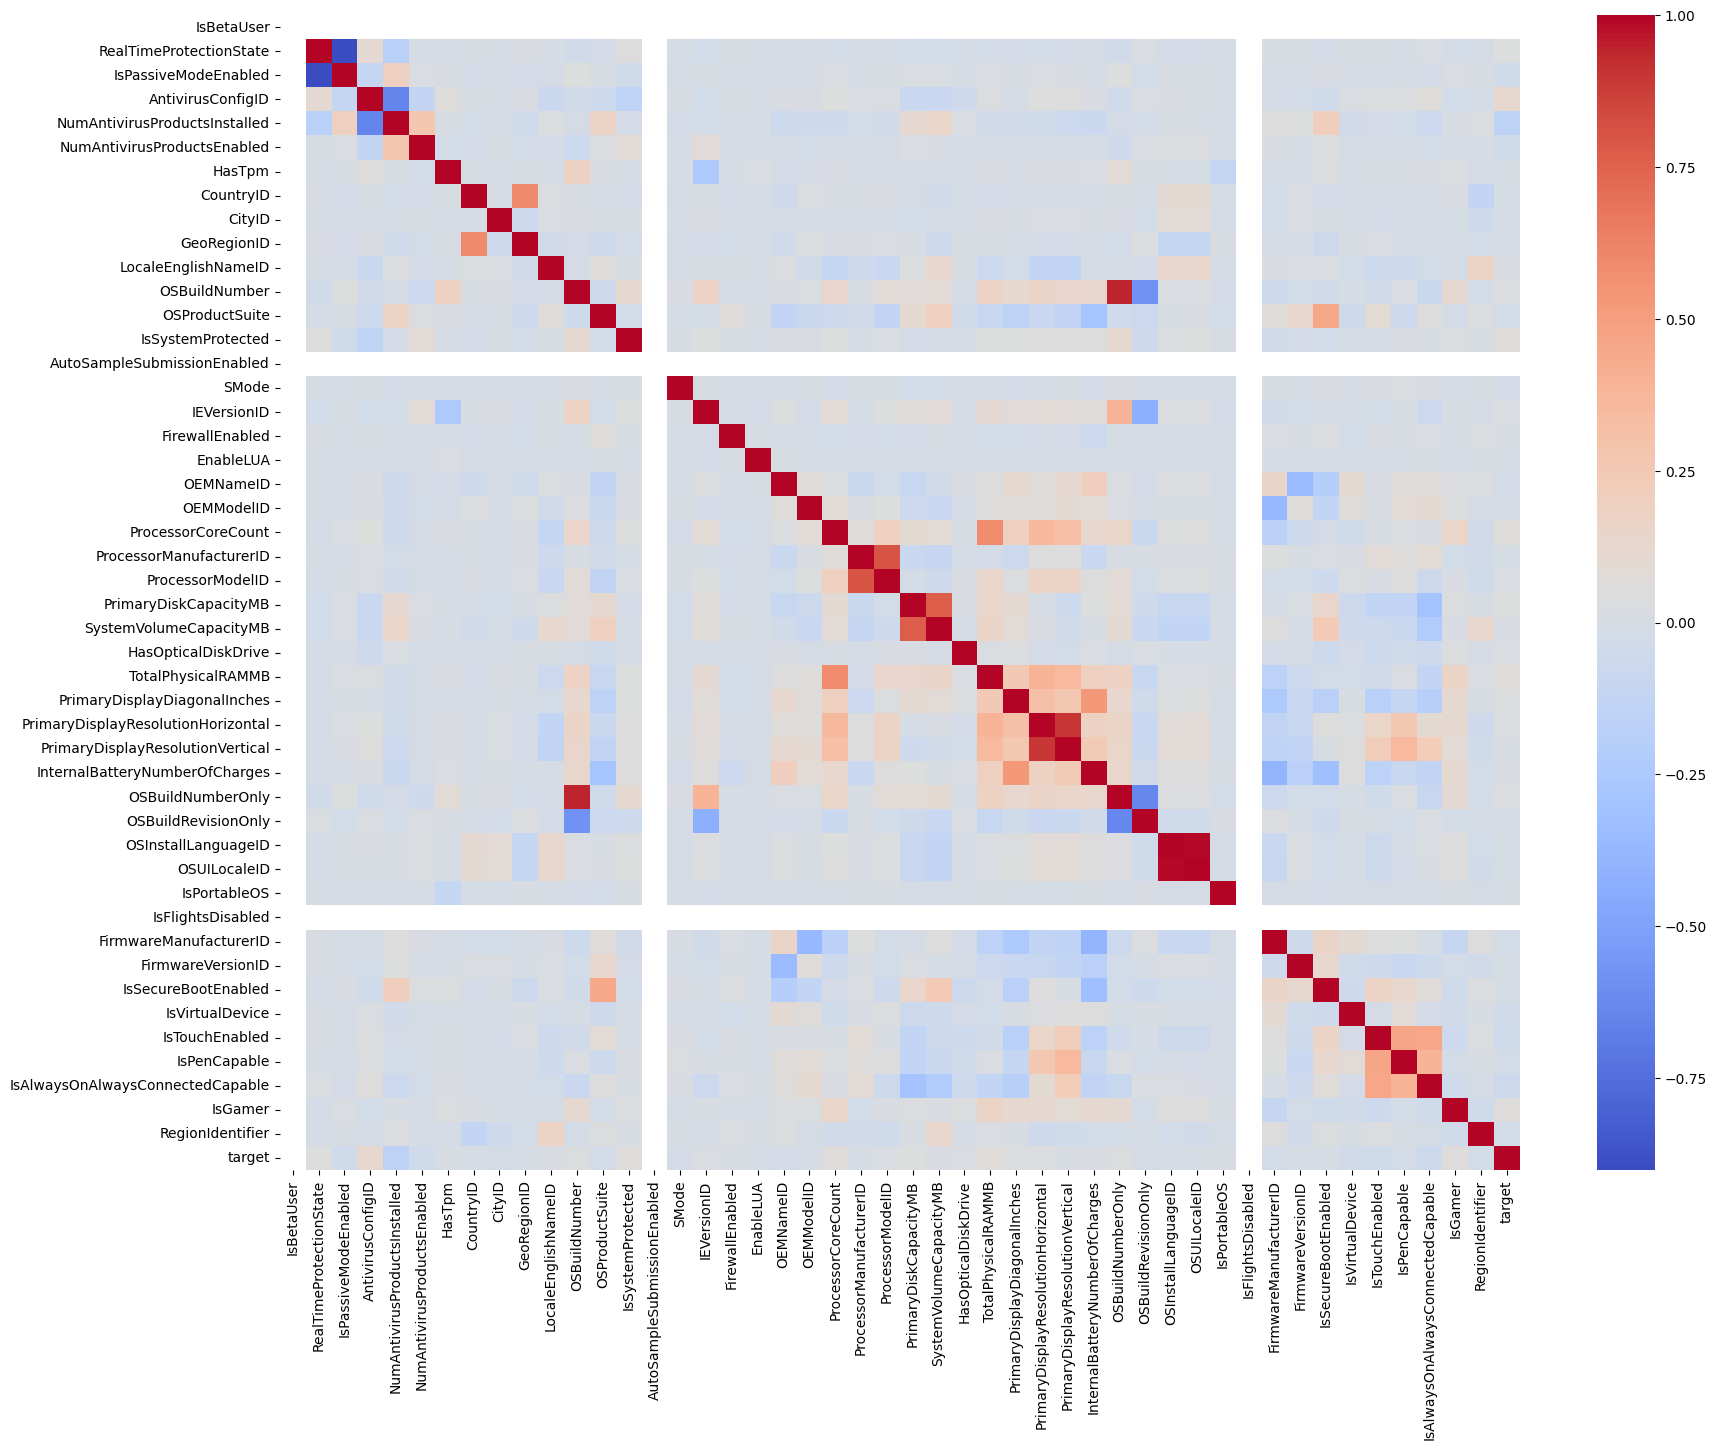

In [10]:
#overview of feature correlations
plt.figure(figsize=(20, 15))  # Increase figure size
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=False, cmap='coolwarm')
plt.show()

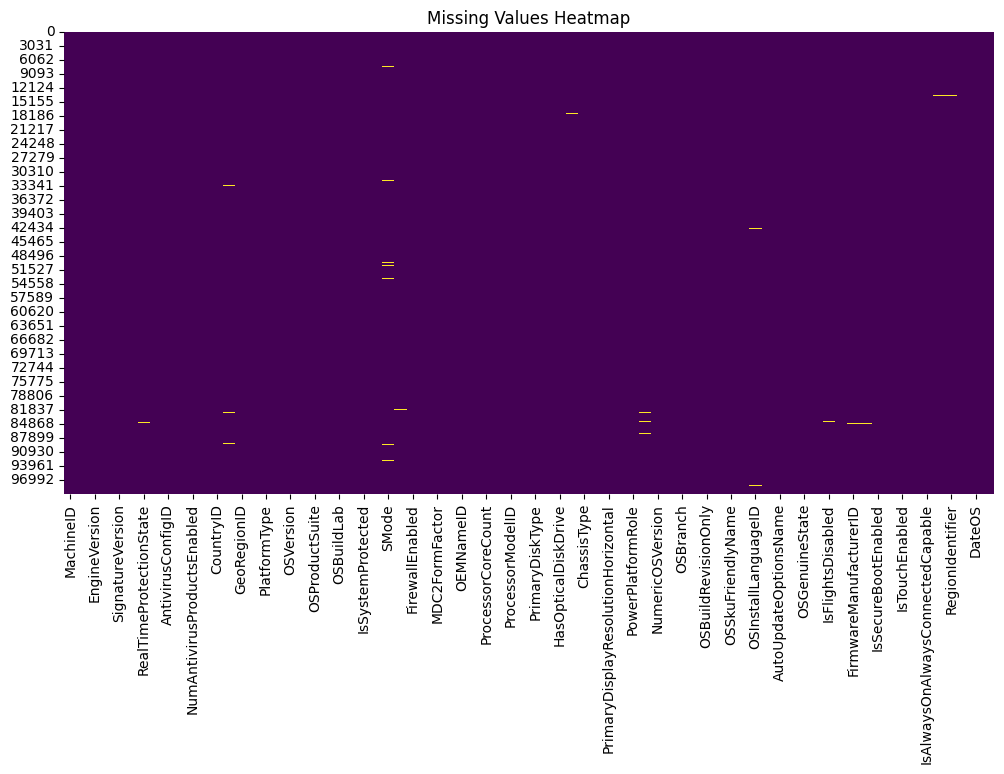

In [11]:
#visualize missing values in the dataset
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

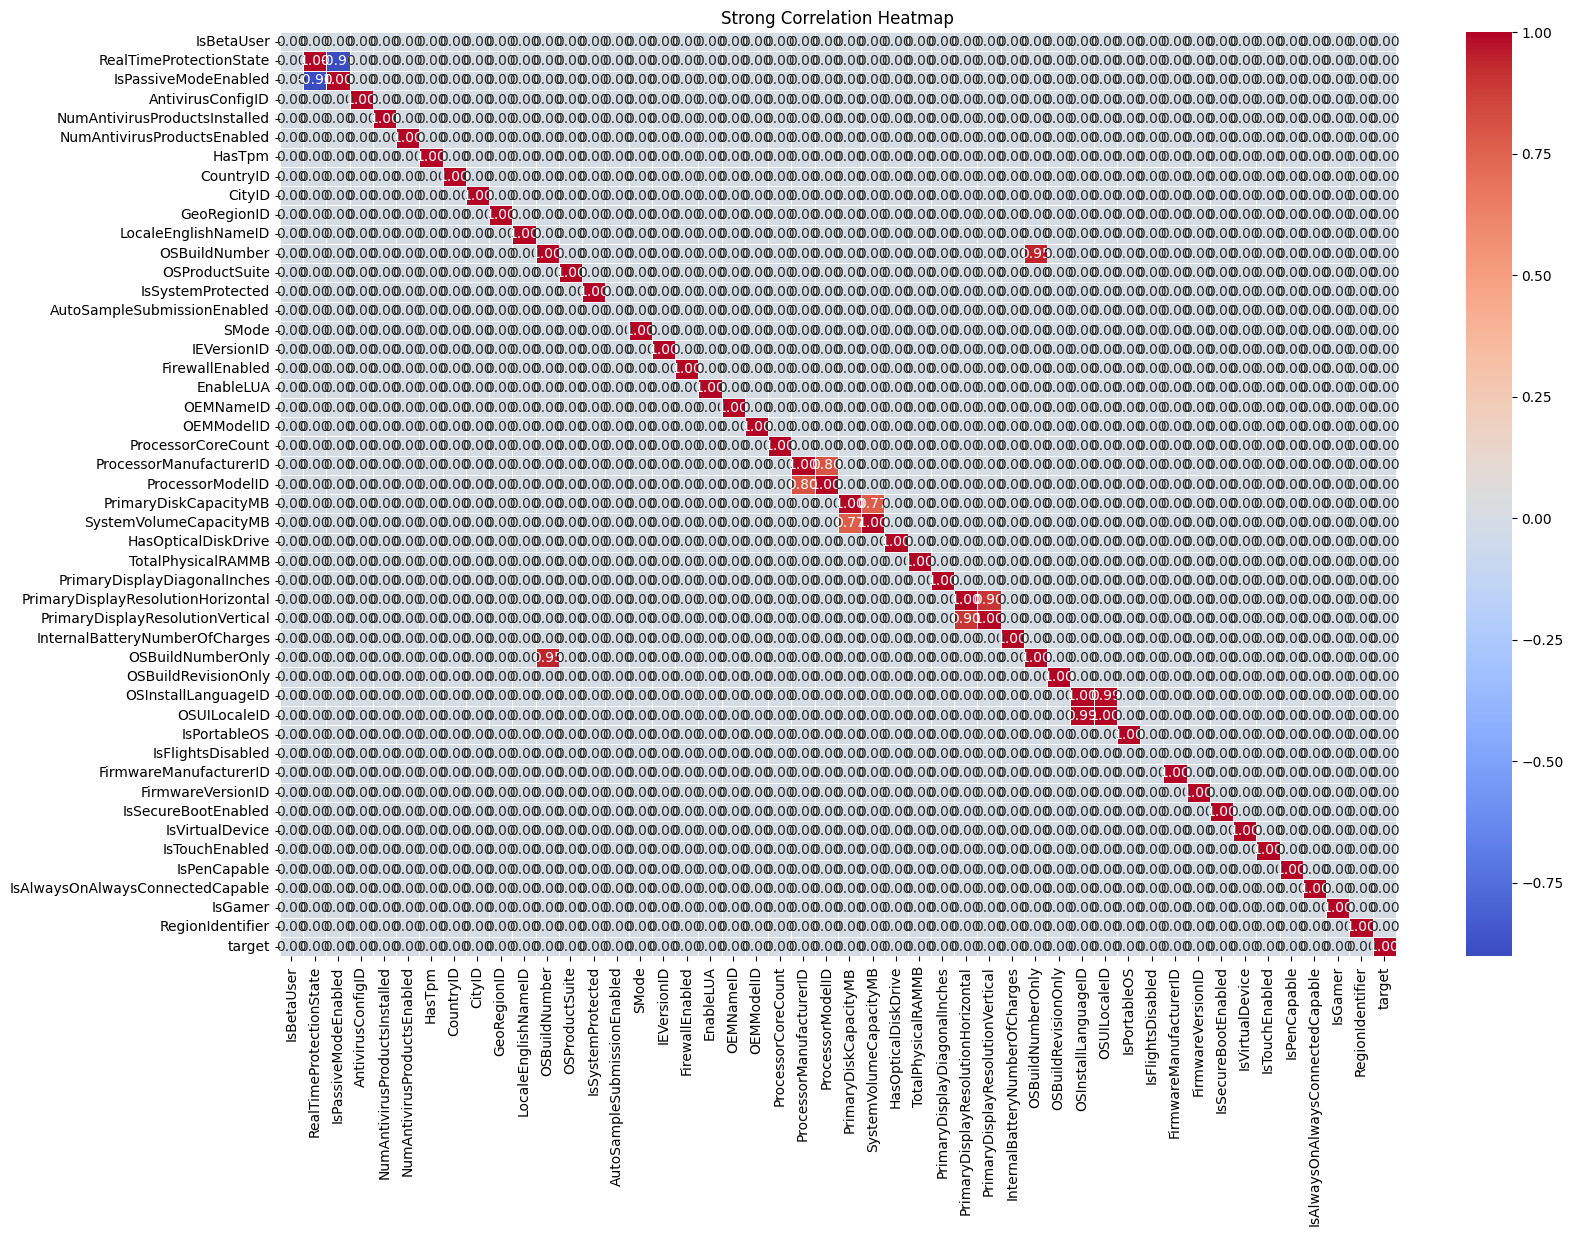

In [12]:
# Compute correlation matrix for numerical columns
num_corr = df.select_dtypes(include=['number']).corr()

# Handle any infinite or missing values by replacing them with 0
num_corr.replace([np.inf, -np.inf], np.nan, inplace=True)
num_corr.fillna(0, inplace=True)

# Extract correlations that are either strongly positive (> 0.7) or strongly negative (< -0.7)
strong_relationships = num_corr.where((num_corr > 0.7) | (num_corr < -0.7), other=0)

# Plot the heatmap to visualize only strong correlations
plt.figure(figsize=(18, 12))
sns.heatmap(strong_relationships, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Strong Correlation Heatmap")
plt.show()

In [13]:
# Handling correlation clutter in large datasets for better interpretation

# Compute correlation matrix for numerical columns
numeric_corr = df.select_dtypes(include=['number']).corr()

# Replace any infinite or missing values with 0
numeric_corr.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_corr.fillna(0, inplace=True)

# Convert correlation matrix into a tabular format
corr_pairs = numeric_corr.unstack().reset_index()
corr_pairs.columns = ["Attribute1", "Attribute2", "Correlation_Value"]

# Remove self-correlations (where both attributes are the same)
corr_pairs = corr_pairs[corr_pairs["Attribute1"] != corr_pairs["Attribute2"]]

# Filter pairs with strong correlations (absolute value > 0.7)
strong_relations = corr_pairs[abs(corr_pairs["Correlation_Value"]) > 0.7]

# Sort by correlation strength in descending order
strong_relations = strong_relations.sort_values(by="Correlation_Value", ascending=False)

# Display the top 20 strongly correlated feature pairs
print("Highly Correlated Feature Pairs:")
print(strong_relations.head(20))


Highly Correlated Feature Pairs:
                              Attribute1                          Attribute2  \
1667                 OSInstallLanguageID                        OSUILocaleID   
1714                        OSUILocaleID                 OSInstallLanguageID   
560                        OSBuildNumber                   OSBuildNumberOnly   
1547                   OSBuildNumberOnly                       OSBuildNumber   
1422  PrimaryDisplayResolutionHorizontal    PrimaryDisplayResolutionVertical   
1469    PrimaryDisplayResolutionVertical  PrimaryDisplayResolutionHorizontal   
1079             ProcessorManufacturerID                    ProcessorModelID   
1126                    ProcessorModelID             ProcessorManufacturerID   
1177               PrimaryDiskCapacityMB              SystemVolumeCapacityMB   
1224              SystemVolumeCapacityMB               PrimaryDiskCapacityMB   
50               RealTimeProtectionState                IsPassiveModeEnabled   
97     

### **Analysis of Highly Correlated Features**  
Analysis of Highly Correlated Features
After evaluating the correlation matrix, I identified several feature pairs with strong correlations (above 0.7). High correlation between features often indicates redundancy, which can introduce unnecessary complexity in our model. To optimize performance, we should consider removing or transforming some of these features. 

| **ATTRIBUTE 1**                          | **ATTRIBUTE 2**                          | **Correlation** | **What This Means** |
|----------------------------------------|----------------------------------------|----------------|--------------------|
| `OSInstallLanguageID`                 | `OSUILocaleID`                         | **0.988**      | Both features likely capture similar OS language settings. Keeping both may not add significant value.|
| `OSBuildNumber`                        | `OSBuildNumberOnly`                    | **0.948**      | Looks like `OSBuildNumberOnly` is just another way of storing `OSBuildNumber`. One of them can be removed. |
| `PrimaryDisplayResolutionHorizontal`   | `PrimaryDisplayResolutionVertical`     | **0.898**      | These represent screen width and height separately. A new feature, Screen Area (width × height), could be introduced instead.|
| `ProcessorManufacturerID`              | `ProcessorModelID`                     | **0.802**      | Since the processor model usually includes the manufacturer info, we might not need both. |
| `PrimaryDiskCapacityMB`                | `SystemVolumeCapacityMB`               | **0.771**      | The system volume is part of the primary disk, making these features closely related. We could keep only one. |
| `RealTimeProtectionState`              | `IsPassiveModeEnabled`                 | **-0.901**     | These two are strongly negatively correlated, meaning when one is active, the other is off. Keeping both may not be necessary. |


### **Recommended Actions**  
- **Drop redundant features** to improve model efficiency.
- **Transform** certain features where appropriate (e.g., create a Screen Area feature instead of separate width and height values).
- **Validate feature** importance before removal to ensure that we are not discarding valuable information.

# Descriptive Statistics

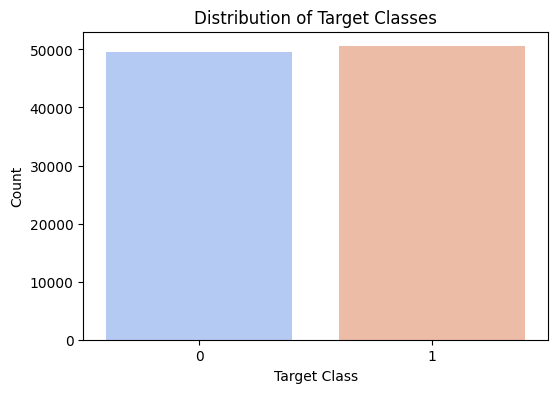

Feature: MachineID | Unique Values: 99835
Feature: ProductName | Unique Values: 2
Feature: EngineVersion | Unique Values: 37
Feature: AppVersion | Unique Values: 69
Feature: SignatureVersion | Unique Values: 2735
Feature: PlatformType | Unique Values: 4
Feature: Processor | Unique Values: 3
Feature: OSVersion | Unique Values: 7
Feature: OsPlatformSubRelease | Unique Values: 9
Feature: OSBuildLab | Unique Values: 281
Feature: SKUEditionName | Unique Values: 8
Feature: MDC2FormFactor | Unique Values: 11
Feature: DeviceFamily | Unique Values: 2
Feature: PrimaryDiskType | Unique Values: 4
Feature: ChassisType | Unique Values: 28
Feature: PowerPlatformRole | Unique Values: 9
Feature: NumericOSVersion | Unique Values: 221
Feature: OSArchitecture | Unique Values: 3
Feature: OSBranch | Unique Values: 13
Feature: OSEdition | Unique Values: 20
Feature: OSSkuFriendlyName | Unique Values: 18
Feature: OSInstallType | Unique Values: 9
Feature: AutoUpdateOptionsName | Unique Values: 6
Feature: OSGenu

In [14]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=df['target'], palette="coolwarm")
plt.title("Distribution of Target Classes")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

# Checking the number of unique values in categorical columns
cat_features = df.select_dtypes(include=['object']).columns

for feature in cat_features:
    unique_count = df[feature].nunique()
    print(f"Feature: {feature} | Unique Values: {unique_count}")

# Data Visulization

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


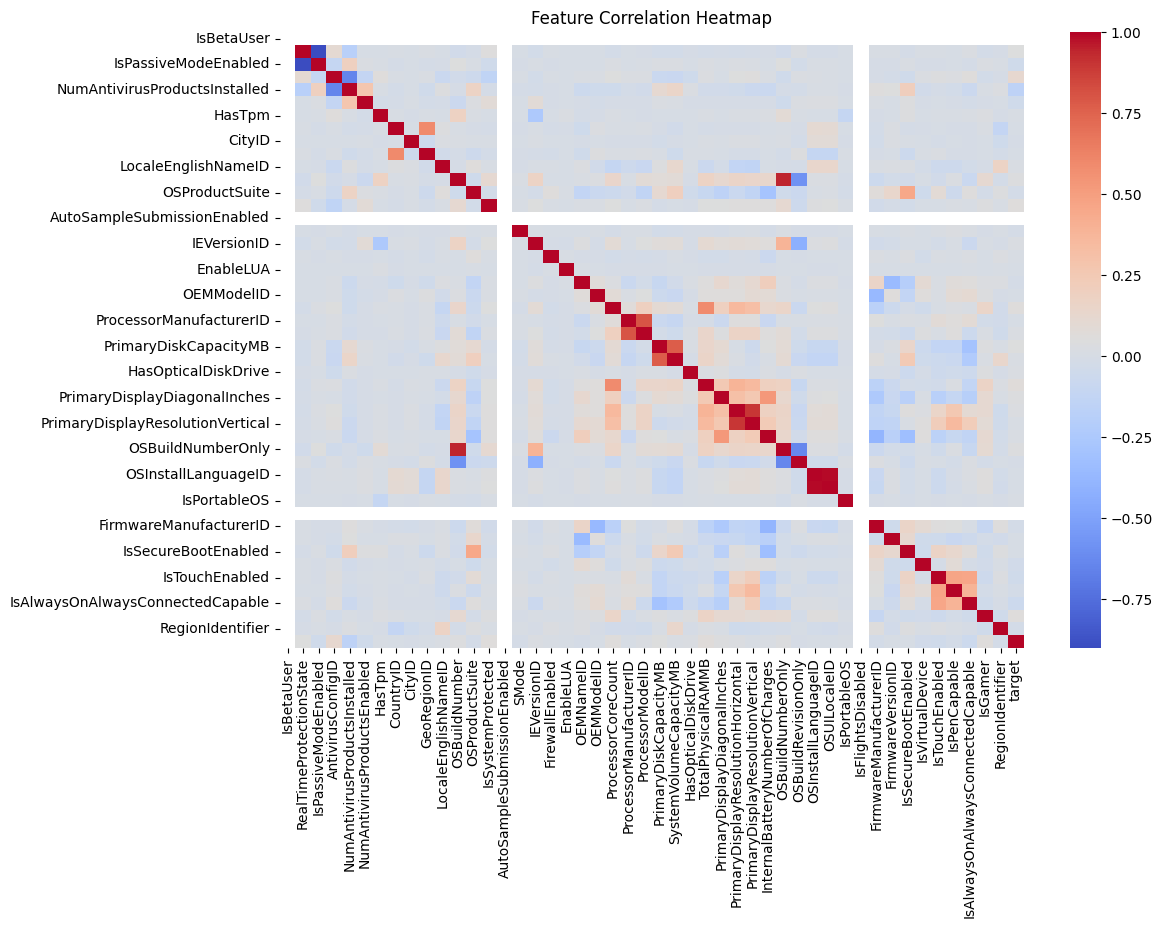

In [15]:
# Visualizing correlation heatmap for numerical features
plt.figure(figsize=(12, 8))

# Compute correlation matrix for numeric features only
num_feature_corr = df.select_dtypes(include=['number']).corr()

# Generate heatmap without annotations for better readability
sns.heatmap(num_feature_corr, cmap='coolwarm', annot=False)

plt.title("Feature Correlation Heatmap")
plt.show()

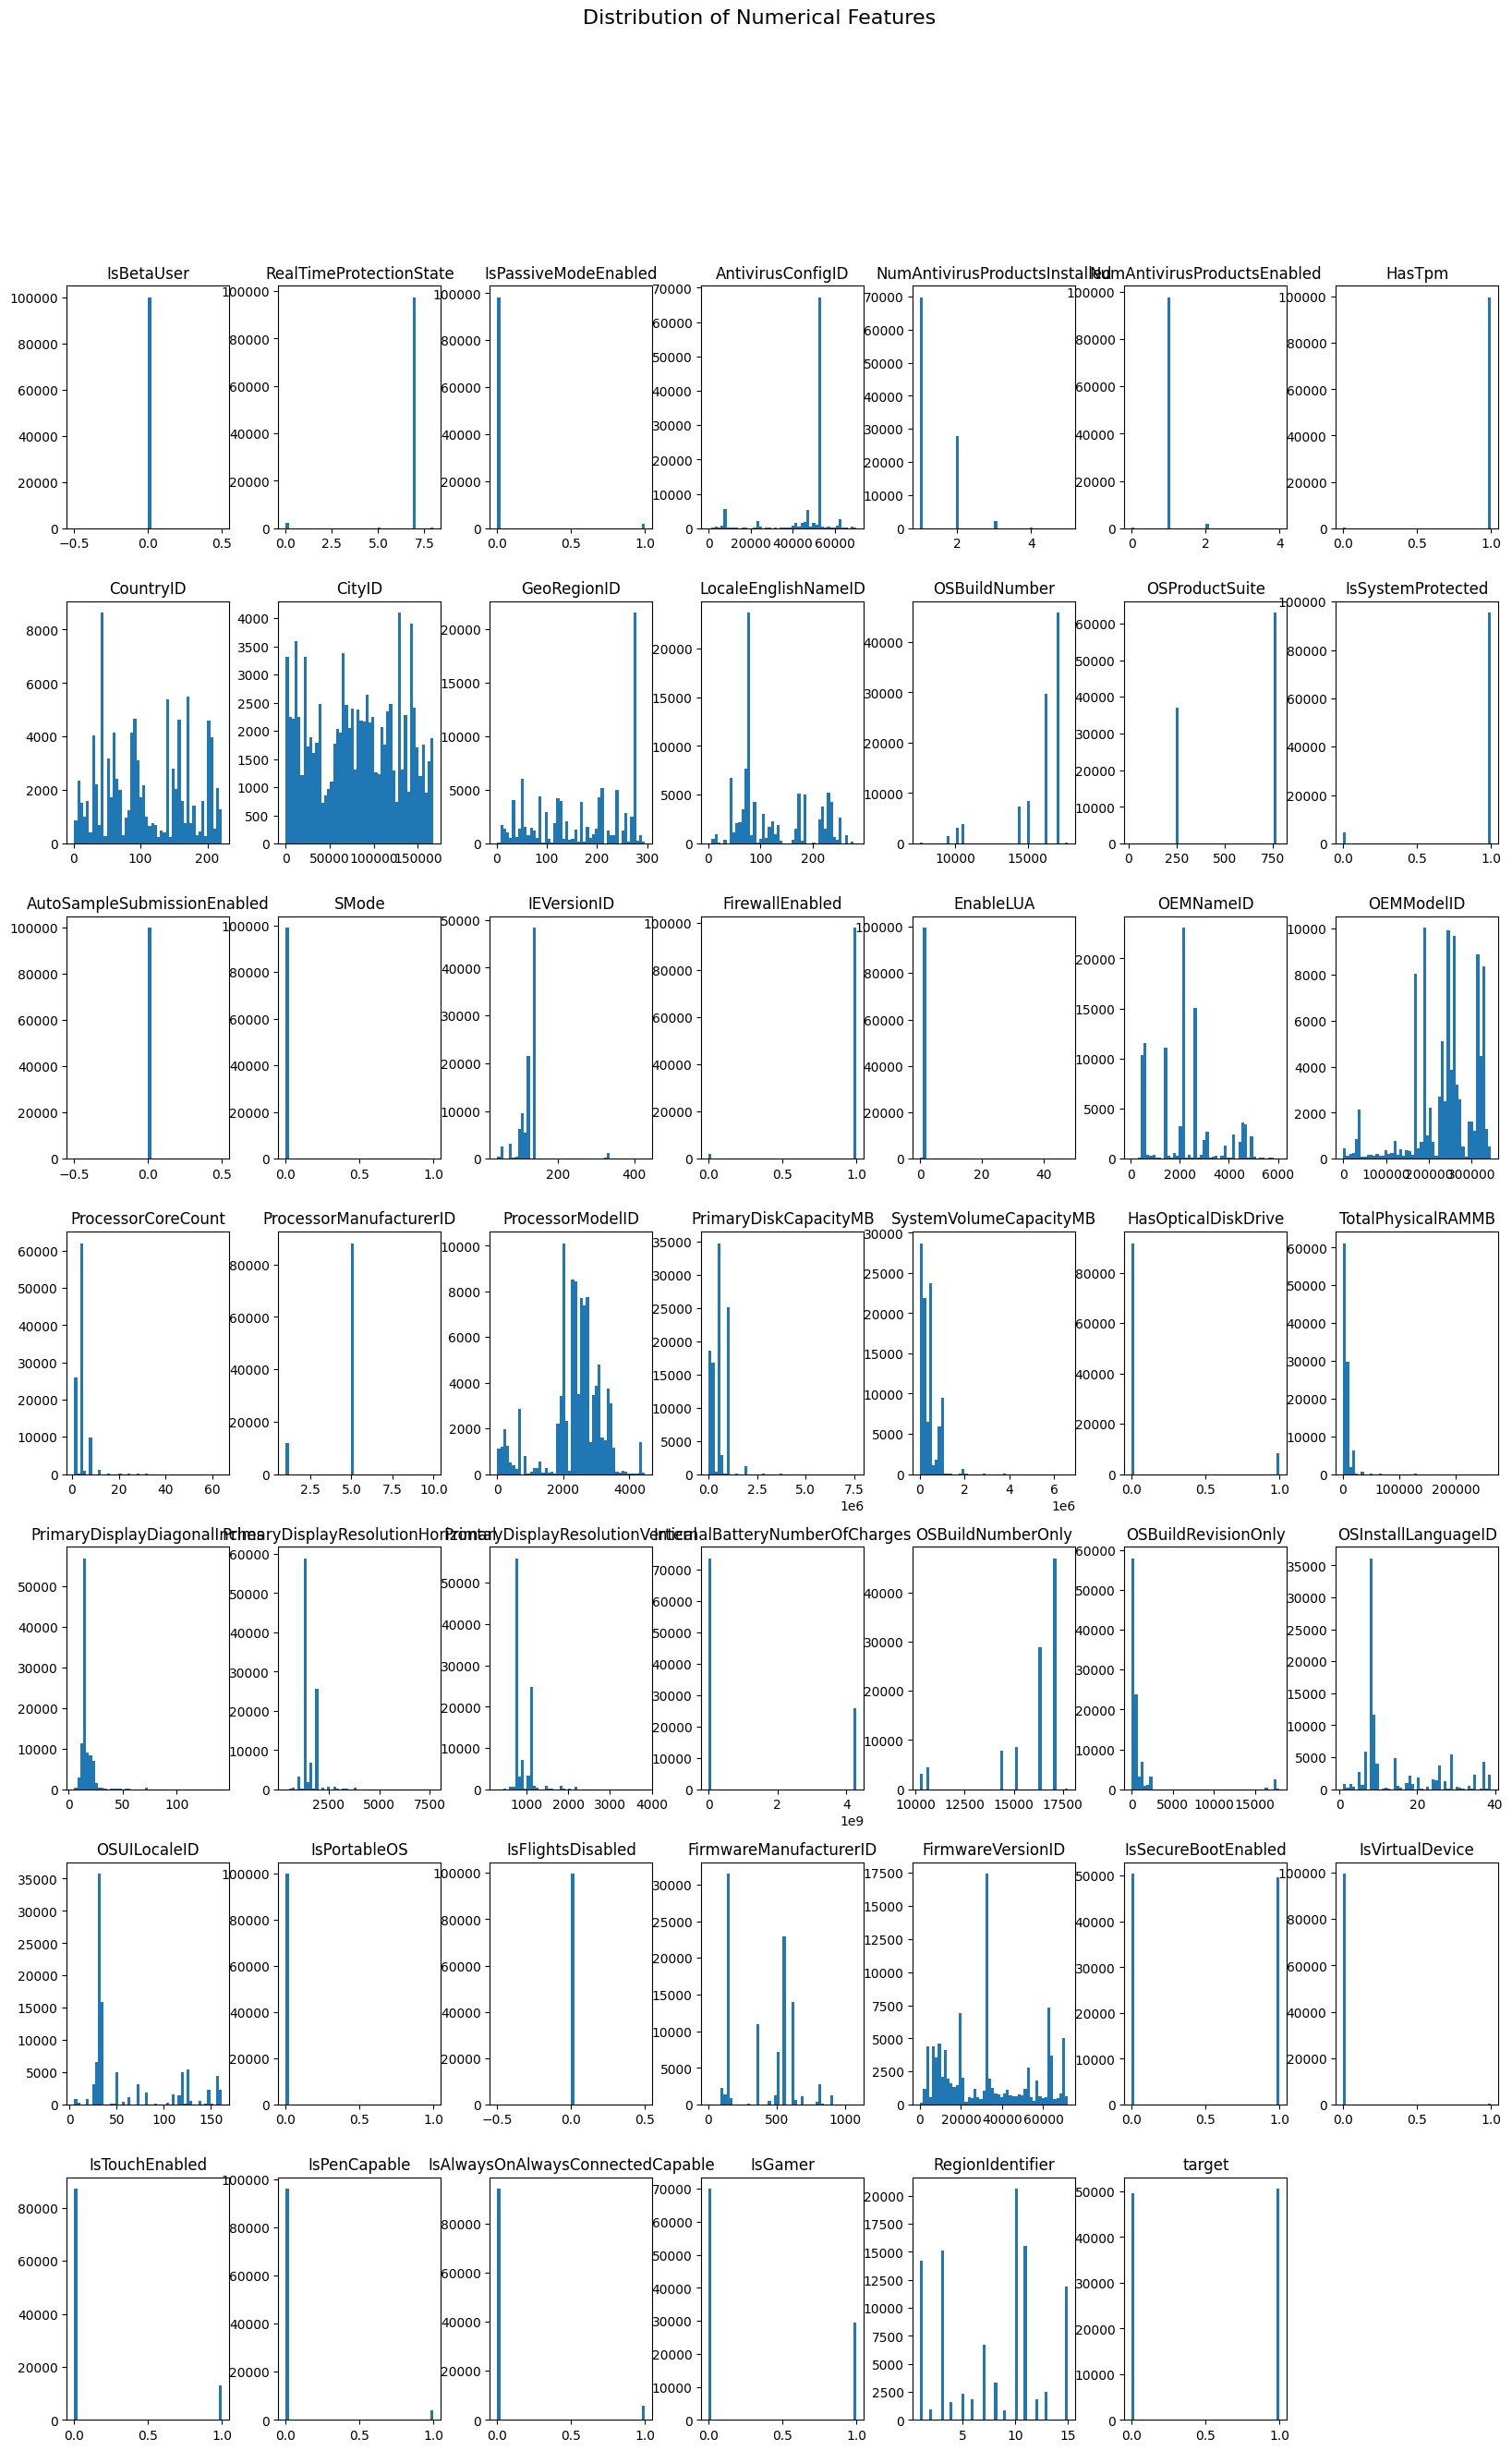

In [16]:
# Visualizing the distribution of numerical features using histograms
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for all numerical features
df[numeric_features].hist(figsize=(20, 30), bins=50, grid=False)

plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

# Train-Validation Split

In [17]:
from sklearn.model_selection import train_test_split

# Prepare the features and target
X = df.drop(columns=['MachineID', 'target'])
y = df['target']

# Split the data: 80% for training and 20% for validation, using stratification based on y
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print the shape of the training and validation sets
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}")

Training set: (80000, 74), Validation set: (20000, 74)


# Data Cleaning/Preprocessing

In [18]:
#Import required libraries and identify feature types
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Identify numerical and categorical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

In [19]:
#Handle missing values
# Impute numerical features with median values
num_imputer = SimpleImputer(strategy="median")
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
test_df[num_cols] = num_imputer.transform(test_df[num_cols])

# Impute categorical features with most frequent value
cat_imputer = SimpleImputer(strategy="most_frequent")
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
test_df[cat_cols] = cat_imputer.transform(test_df[cat_cols])

In [20]:
#Encode categorical features
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_val[cat_cols] = encoder.transform(X_val[cat_cols])
test_df[cat_cols] = encoder.transform(test_df[cat_cols])

In [21]:
#Convert date columns to numerical format (Unix timestamp)
for col in ["DateAS", "DateOS"]:
    X_train[col] = pd.to_datetime(X_train[col]).astype(int) // 10**9
    X_val[col] = pd.to_datetime(X_val[col]).astype(int) // 10**9
    test_df[col] = pd.to_datetime(test_df[col]).astype(int) // 10**9

In [22]:
#Scale numerical features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val_scaled[num_cols] = scaler.transform(X_val[num_cols])

# Model Training

## 1. Logistic Regression 

In [23]:
#Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train)

#Make Predictions on Validation Set
y_val_pred_logreg = log_reg.predict(X_val_scaled)

#Evaluate Model Performance
logreg_accuracy = accuracy_score(y_val, y_val_pred_logreg)
print(f" Logistic Regression Validation Accuracy: {logreg_accuracy:.4f}")

print("\n Classification Report for Logistic Regression:")
print(classification_report(y_val, y_val_pred_logreg))

 Logistic Regression Validation Accuracy: 0.5990

 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.61      0.52      0.56      9895
           1       0.59      0.68      0.63     10105

    accuracy                           0.60     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.60      0.60      0.60     20000



## 2. Random Forest

Random Forest Validation Accuracy: 0.61955

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.54      0.58      9895
           1       0.61      0.70      0.65     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



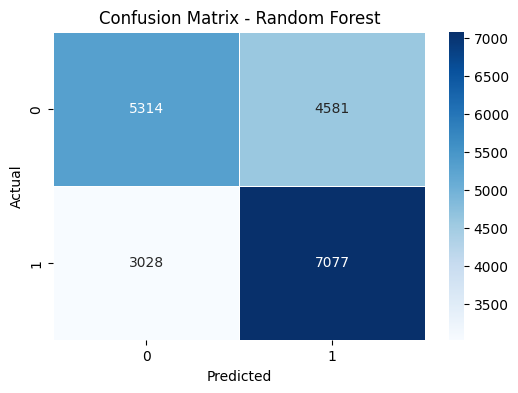

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cell 1: Initialize Random Forest Model with Optimized Hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=200,  # Increased trees for better generalization
    max_depth=15,  # Limit depth to reduce overfitting
    min_samples_split=5,  # Prevents overfitting by requiring a minimum of 5 samples to split
    min_samples_leaf=2,  # Ensures each leaf has at least 2 samples
    random_state=42,
    n_jobs=-1,  # Utilizes all CPU cores for faster training
    class_weight="balanced"  # Handles imbalanced datasets effectively
)

# Cell 2: Train the Random Forest Model
rf_model.fit(X_train, y_train)

# Cell 3: Make Predictions on Validation Set
y_val_pred_rf = rf_model.predict(X_val)

# Cell 4: Evaluate Model Performance
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)
print(f"Random Forest Validation Accuracy: {rf_accuracy:.5f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_rf))

# Cell 5: Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred_rf), annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## Hyperparameter tuning

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Random Forest Hyperparameter Tuning
rf_params = {
    'n_estimators': [100, 200],  # Reduce large trees for speed
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_search = HalvingRandomSearchCV(
    rf, rf_params, factor=2, min_resources=100,  # Must be an integer
    cv=3, scoring='accuracy', n_jobs=-1, verbose=1
)
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
y_pred_rf = best_rf.predict(X_val)
rf_accuracy = accuracy_score(y_val, y_pred_rf)
print(f"Optimized Random Forest Accuracy: {rf_accuracy:.4f}")
print("Best Random Forest Params:", rf_search.best_params_)


# SGD Classifier Hyperparameter Tuning
sgd_params = {
    'loss': ['hinge', 'log_loss'],
    'penalty': ['l2', 'l1'],
    'alpha': np.logspace(-4, 0, 5),
    'learning_rate': ['optimal', 'invscaling'],
    'eta0': [0.001, 0.01],
    'max_iter': [1000, 2000]
}

sgd = SGDClassifier(random_state=42)
sgd_search = HalvingRandomSearchCV(
    sgd, sgd_params, factor=2, min_resources=100,  # Must be an integer
    cv=3, scoring='accuracy', n_jobs=-1, verbose=1
)
sgd_search.fit(X_train, y_train)

best_sgd = sgd_search.best_estimator_
y_pred_sgd = best_sgd.predict(X_val)
sgd_accuracy = accuracy_score(y_val, y_pred_sgd)
print(f"Optimized SGD Accuracy: {sgd_accuracy:.4f}")
print("Best SGD Params:", sgd_search.best_params_)


n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 10
min_resources_: 100
max_resources_: 80000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 48
n_resources: 100
Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 48 is smaller than n_iter=800. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 24
n_resources: 200
Fitting 3 folds for each of 24 candidates, totalling 72 fits
----------
iter: 2
n_candidates: 12
n_resources: 400
Fitting 3 folds for each of 12 candidates, totalling 36 fits
----------
iter: 3
n_candidates: 6
n_resources: 800
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 4
n_candidates: 3
n_resources: 1600
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 5
n_candidates: 2
n_resources: 3200
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Optimized Random Forest Accuracy: 0.6166
Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'class_weight': 'balanced'}
n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 10
min_resources_: 100
max_resources_: 80000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 160
n_resources: 100
Fitting 3 folds for each of

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 160 is smaller than n_iter=800. Running 160 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 80
n_resources: 200
Fitting 3 folds for each of 80 candidates, totalling 240 fits
----------
iter: 2
n_candidates: 40
n_resources: 400
Fitting 3 folds for each of 40 candidates, totalling 120 fits
----------
iter: 3
n_candidates: 20
n_resources: 800
Fitting 3 folds for each of 20 candidates, totalling 60 fits
----------
iter: 4
n_candidates: 10
n_resources: 1600
Fitting 3 folds for each of 10 candidates, totalling 30 fits
----------
iter: 5
n_candidates: 5
n_resources: 3200
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 6
n_candidates: 3
n_resources: 6400
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 7
n_candidates: 2
n_resources: 12800
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Optimized SGD Accuracy: 0.5280
Best SGD Params: {'penalty': 'l1', 'max_iter': 2000, 'loss': 'log_loss', 'learning_rate': 'optimal', 'eta0': 0.001, 'alpha': 0.01}


## 3. SVM

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 🔹 Use optimized hyperparameters directly (no search to save time)
svm = SVC(C=1, kernel='rbf', gamma='scale', random_state=42)

# 🔹 Train and evaluate
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_val_scaled)

# 🔹 Accuracy check
svm_accuracy = accuracy_score(y_val, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.5323


## 4. KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Use optimized KNN parameters
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean', n_jobs=-1)

# Train and evaluate
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_val_scaled)

# Accuracy check
knn_accuracy = accuracy_score(y_val, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

KNN Accuracy: 0.5419


## 5. Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)
print("Gradient Boosting Accuracy:", accuracy_score(y_val, y_pred_gb))

Gradient Boosting Accuracy: 0.6216


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#Improved hyperparameter grid (More refined & efficient)
param_grid = {
    'n_estimators': [150, 250],  # Balanced between speed & accuracy
    'learning_rate': [0.05, 0.1, 0.15],  # More refined tuning
    'max_depth': [3, 4, 5],  # Small tweaks for performance
    'subsample': [0.85, 1.0],  # Slightly reduced to prevent overfitting
}

#Initialize Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

#Grid Search with 3-fold CV (Parallel processing enabled)
grid_search = GridSearchCV(
    gb, param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy'
)

#Train & find the best model
grid_search.fit(X_train, y_train)
best_gb = grid_search.best_estimator_

#Make predictions & evaluate
y_pred_best_gb = best_gb.predict(X_val)
best_gb_accuracy = accuracy_score(y_val, y_pred_best_gb)

print(f"Best Gradient Boosting Accuracy: {best_gb_accuracy:.4f}")
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Gradient Boosting Accuracy: 0.6262
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 250, 'subsample': 1.0}


## Final Submission

In [30]:
# Drop 'MachineID' if it's not a feature used during training
test_df = test_df.drop(columns=['MachineID'], errors='ignore')

# Predict on test data
y_pred = best_gb.predict(test_df)

# Save predictions to CSV
submission = pd.DataFrame({
    "id": range(0, test_df.shape[0]),  # Generate row IDs
    "target": y_pred
})
submission.to_csv('submission.csv', index=False)

print("Submission file saved successfully!")


Submission file saved successfully!


In [31]:
submission = pd.DataFrame({
    "id": range(0, test_df.shape[0]),
    "target": y_pred
})
submission.to_csv('submission.csv', index=False)